<a href="https://colab.research.google.com/github/smathews88/tensor-flow/blob/main/03_nueral_network_regression_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Create a model for house price predict**

# Read Data

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.utils import plot_model

tf.random.set_seed(42)


In [ ]:
#Read data from csv file

df_house = pd.read_csv("/content/Housing.csv")
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Visualize Data

<Axes: ylabel='Frequency'>

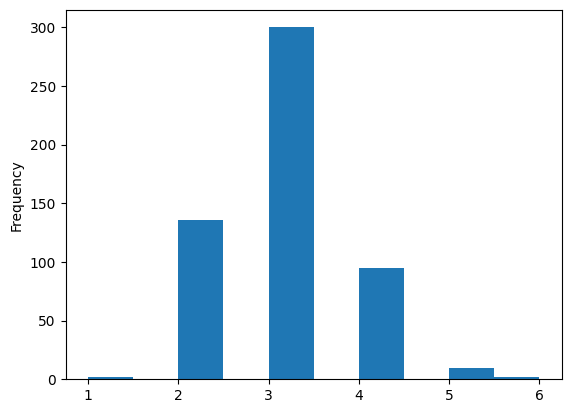

In [ ]:
#plot numeric feature
df_house["bedrooms"].plot(kind = "hist")

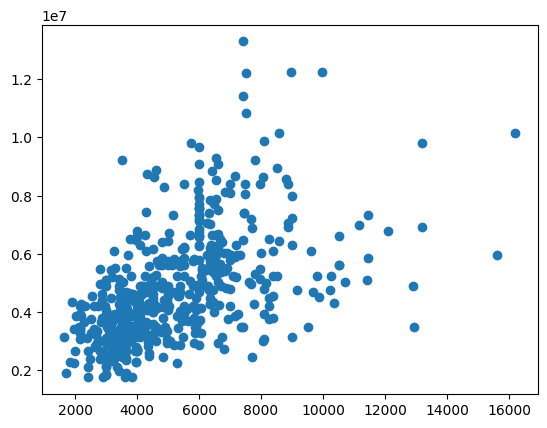

In [ ]:
#Visualize how price is impacted by number of area
plt.scatter(df_house["area"],df_house["price"])

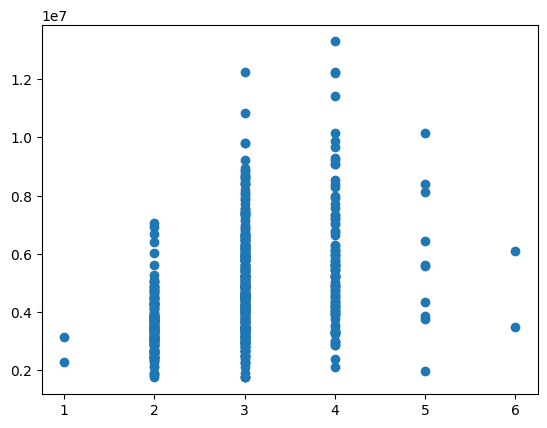

In [ ]:
#Visualize how price is impacted by number of area
plt.scatter(df_house["bedrooms"],df_house["price"])

# Pre-processing data

1.   One hot encoding - for boolean or categorical values
2.   Normalization and Standardization for numerical values

In [ ]:
#create input and output from dataset

X = df_house.drop("price", axis = 1)
y = df_house["price"]
X.shape, y.shape

((545, 12), (545,))

In [ ]:
#split data into train test and validation set
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=42, shuffle = True)

X_train.shape, X_val.shape, X_test.shape

((327, 12), (109, 12), (109, 12))

In [ ]:
df_house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
#One hot encoding to replace boolean and categorical data
#Normalization to scale numerical values to range from 0 to 1

ct = make_column_transformer (
    (MinMaxScaler(),['area', 'bedrooms', 'bathrooms', 'stories', 'parking' ]),
    (OneHotEncoder(), ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])
)
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)
X_val_trans = ct.transform(X_val)
X_train_trans, X_test_trans, X_val_trans
X_train_trans.shape

(327, 20)

# Create Model

In [ ]:
#Create a model
model = tf.keras.Sequential(name = "House_Price_Prediction");
model.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.relu, name="Input_Layer"))
model.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.relu, name="Output_Layer"))

# Compile Model

In [ ]:
#Create a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=.1),
              metrics = tf.keras.metrics.mae)

# Fit Model

In [ ]:
#fit the model
history = model.fit(X_train_trans,y_train, epochs = 20)

Epoch 1/20
11/11 [==============================] - 1s 5ms/step - loss: 4708742.0000 - mean_absolute_error: 4708742.0000
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 4614447.0000 - mean_absolute_error: 4614447.0000
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 4117504.5000 - mean_absolute_error: 4117504.5000
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 2603385.0000 - mean_absolute_error: 2603385.0000
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 1316059.5000 - mean_absolute_error: 1316059.5000
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 1116933.6250 - mean_absolute_error: 1116933.6250
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 1012200.8125 - mean_absolute_error: 1012200.8125
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 908597.6250 - mean_absolute_error: 908597.6250
Epoch 9/20
11/11 [================

In [ ]:
model.summary()

Model: "House_Price_Prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 100)               2100      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 Output_Layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 12301 (48.05 KB)
Trainable params: 12301 (48.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


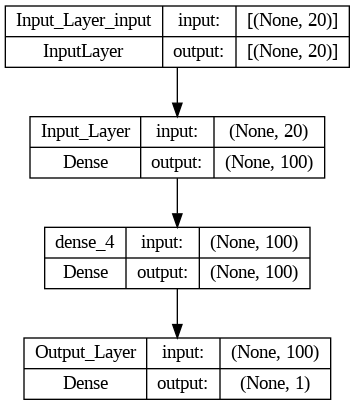

In [ ]:
plot_model(model=model, show_shapes = True)

# Evaluate Model

In [ ]:
y_pred_trans = model.predict(X_val_trans)
y_pred_trans.squeeze()

4/4 [==============================] - 0s 6ms/step


array([5179576. , 3487935.5, 3252297.5, 4000449.8, 6050591. , 3888714.5,
       4707094. , 5294674. , 6188913.5, 5815091. , 5352395.5, 5241190.5,
       3660473. , 5679397.5, 3451773.5, 4174555. , 5997051. , 6159852. ,
       5836163. , 3844406.5, 3612192.8, 4334347.5, 4563685.5, 4436683.5,
       5946597.5, 5052928. , 4535384.5, 2415383.2, 5492673.5, 4757923.5,
       3546257.8, 6407060.5, 4158258.8, 6746436. , 6241020.5, 5070999.5,
       2838115. , 4933041. , 5901724.5, 3517484. , 3258752.2, 5209893. ,
       6546722.5, 4055531. , 6057294. , 5497061. , 3820972.2, 4074777. ,
       6412591.5, 3692001.5, 5620892. , 4940414.5, 3459657. , 6501064. ,
       6737408.5, 6821637.5, 5611996. , 3983313. , 3728673.8, 3425815.8,
       3685542.5, 5314169. , 4267134.5, 3403279.2, 3615046. , 3175832.8,
       3334528.2, 4814171. , 3724738.8, 3498377.2, 4169826. , 6572828.5,
       2803739.5, 5884384.5, 2332401.8, 5787162.5, 4863930.5, 5196290.5,
       6703096. , 7696670.5, 4079686.5, 3338236.2, 

In [ ]:
model.evaluate(X_test_trans, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 949972.5625 - mean_absolute_error: 949972.5625


[949972.5625, 949972.5625]

In [ ]:
#find MAE
tf.keras.metrics.mean_absolute_error(y_val,y_pred_trans)

<tf.Tensor: shape=(109,), dtype=float32, numpy=
array([1461868.5, 1479873.1, 1622709.9, 1326154.6, 1886277.6, 1346013.8,
       1344250.2, 1503132.8, 1974370.4, 1748163.9, 1526498.2, 1482357.1,
       1404321.1, 1678223.5, 1499026.2, 1305610.1, 1852806.6, 1955443.1,
       1759569.8, 1354550. , 1422750.9, 1302454.5, 1321319. , 1308152.8,
       1821918.9, 1421606.8, 1317692.5, 2287912.8, 1588907. , 1353110.6,
       1452127.1, 2123001.5, 1306955.5, 2376143.8, 2008311.5, 1427077.8,
       1916958.1, 1389913.9, 1795983. , 1465383.6, 1618505.5, 1471603.4,
       2225321.5, 1317564. , 1890521. , 1590959.9, 1359065.1, 1315104.6,
       2126908.8, 1393618.8, 1649282.4, 1391740.1, 1494759. , 2191391.5,
       2369269.8, 2435210.8, 1644956.8, 1328950.1, 1382198.2, 1513307. ,
       1395811.2, 1510823.5, 1301661.5, 1526746.2, 1421572.8, 1673327.5,
       1569963.9, 1363266.8, 1383317.2, 1474412.8, 1306000.8, 2244721.2,
       1944911.9, 1785960.8, 2365908.5, 1733465.8, 1373476.1, 1467235.4,
   

In [ ]:
#find MSE
tf.keras.metrics.mean_squared_error(y_val,y_pred_trans)

<tf.Tensor: shape=(109,), dtype=float32, numpy=
array([3.1867632e+12, 4.3815002e+12, 5.0020609e+12, 3.4152131e+12,
       4.8037123e+12, 3.5810962e+12, 2.9444276e+12, 3.3134262e+12,
       5.2001075e+12, 4.2168673e+12, 3.3869228e+12, 3.2512737e+12,
       3.9975413e+12, 3.9290992e+12, 4.4695206e+12, 3.2065011e+12,
       4.6605533e+12, 5.1136498e+12, 4.2648582e+12, 3.6537898e+12,
       4.0989829e+12, 3.0683019e+12, 2.9591971e+12, 3.0066200e+12,
       4.5308938e+12, 3.0780062e+12, 2.9669715e+12, 8.1037414e+12,
       3.5933140e+12, 2.9490652e+12, 4.2450504e+12, 5.9030220e+12,
       3.2234652e+12, 7.1857676e+12, 5.3593558e+12, 3.0915628e+12,
       6.3619706e+12, 3.0046117e+12, 4.4198537e+12, 4.3115185e+12,
       4.9835829e+12, 3.2175562e+12, 6.4030135e+12, 3.3426272e+12,
       4.8220393e+12, 3.6004034e+12, 3.6938250e+12, 3.3186956e+12,
       5.9220809e+12, 3.9338126e+12, 3.8163872e+12, 3.0082959e+12,
       4.4501083e+12, 6.2352633e+12, 7.1486648e+12, 7.5011855e+12,
       3.79984

Text(0.5, 0, 'epochs')

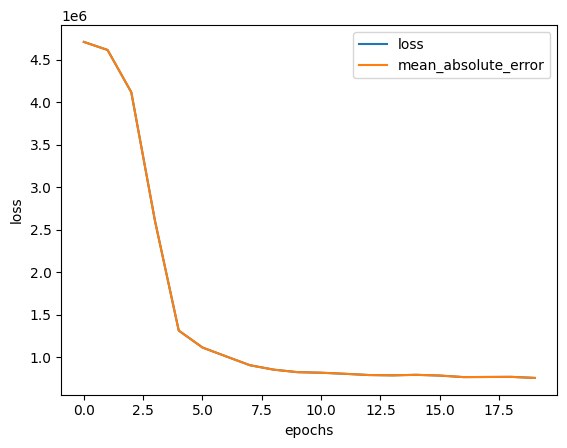

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


# Saving Model

In [ ]:
model.save("house_price_prediction")

# Load Model

In [ ]:
new_model = tf.keras.models.load_model("house_price_prediction")

In [ ]:
new_model.summary()

Model: "House_Price_Prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 100)               2100      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 Output_Layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 12301 (48.05 KB)
Trainable params: 12301 (48.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred_new_model = new_model.predict([X_val_trans])

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred_new_model.squeeze()

array([5179576. , 3487935.5, 3252297.5, 4000449.8, 6050591. , 3888714.5,
       4707094. , 5294674. , 6188913.5, 5815091. , 5352395.5, 5241190.5,
       3660473. , 5679397.5, 3451773.5, 4174555. , 5997051. , 6159852. ,
       5836163. , 3844406.5, 3612192.8, 4334347.5, 4563685.5, 4436683.5,
       5946597.5, 5052928. , 4535384.5, 2415383.2, 5492673.5, 4757923.5,
       3546257.8, 6407060.5, 4158258.8, 6746436. , 6241020.5, 5070999.5,
       2838115. , 4933041. , 5901724.5, 3517484. , 3258752.2, 5209893. ,
       6546722.5, 4055531. , 6057294. , 5497061. , 3820972.2, 4074777. ,
       6412591.5, 3692001.5, 5620892. , 4940414.5, 3459657. , 6501064. ,
       6737408.5, 6821637.5, 5611996. , 3983313. , 3728673.8, 3425815.8,
       3685542.5, 5314169. , 4267134.5, 3403279.2, 3615046. , 3175832.8,
       3334528.2, 4814171. , 3724738.8, 3498377.2, 4169826. , 6572828.5,
       2803739.5, 5884384.5, 2332401.8, 5787162.5, 4863930.5, 5196290.5,
       6703096. , 7696670.5, 4079686.5, 3338236.2, 

# Download and save model to google drive

In [ ]:
! cp -r "/content/house_price_prediction" "/content/drive/MyDrive/Colab Notebooks"

In [ ]:
! ls "/content/drive/MyDrive/Colab Notebooks"

00_tensorflow_fundementals.ipynb			   house_price_prediction
01_nueral_network_regression_tensorflow.ipynb		   house_price_prediction.h5
03_nueral_network_regression_house_price_prediction.ipynb  regression_model.h5
